#  **Stock Market Prediction And Forecasting Using Stacked LSTM**





In [ ]:
#import Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

**Load the Dataset**

In [ ]:
df=pd.read_csv("NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
# convert the data of string type to datetime
df['Date']=pd.to_datetime(df['Date'])
print(type(df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
#sort date data
df=df.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.reset_index(inplace=True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df_close=df['Close']

Text(0.5, 1.0, 'Stock prediction')

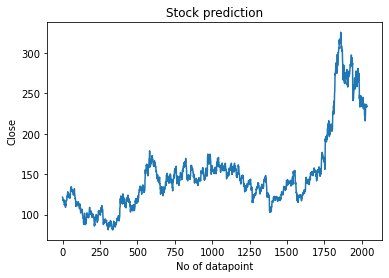

In [ ]:
plt.plot(df_close)
plt.xlabel('No of datapoint')
plt.ylabel('Close')
plt.title('Stock prediction')

**Data Normalization**

In [ ]:
## we need to scale the data as LSTM are sensitive to the scale of the data.
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

**Windowed dataset**

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ##Here i=0 to 100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**MODEL**

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')
model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 11s 259ms/step - loss: 0.0721 - accuracy: 8.4034e-04 - val_loss: 0.0306 - val_accuracy: 0.0000e+00
Epoch 2/60
19/19 [==============================] - 4s 202ms/step - loss: 0.0271 - accuracy: 8.4034e-04 - val_loss: 0.0292 - val_accuracy: 0.0000e+00
Epoch 3/60
19/19 [==============================] - 4s 186ms/step - loss: 0.0233 - accuracy: 8.4034e-04 - val_loss: 0.0267 - val_accuracy: 0.0000e+00
Epoch 4/60
19/19 [==============================] - 3s 174ms/step - loss: 0.0230 - accuracy: 8.4034e-04 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 5/60
19/19 [==============================] - 3s 171ms/step - loss: 0.0239 - accuracy: 8.4034e-04 - val_loss: 0.0246 - val_accuracy: 0.0000e+00
Epoch 6/60
19/19 [==============================] - 3s 167ms/step - loss: 0.0214 - accuracy: 8.4034e-04 - val_loss: 0.0236 - val_accuracy: 0.0000e+00
Epoch 7/60
19/19 [==============================] - 3s 166ms/step - loss: 0.0199 - accuracy: 8.4034

**Prediction**

In [ ]:
## Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.012107852071842402

In [ ]:
#R-Square
from sklearn import metrics
np.round(metrics.r2_score(y_train, train_predict),2)

0.98

In [ ]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_test, test_predict))

0.04782256677536553

In [ ]:
#R-Square
np.round(metrics.r2_score(y_test, test_predict),2)

0.96

In [ ]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

**Visualization**

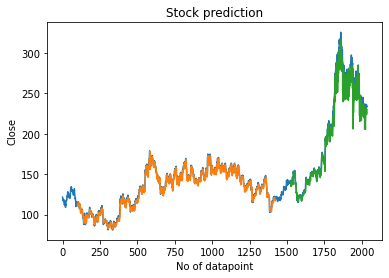

In [ ]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df1) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('No of datapoint')
plt.ylabel('Close')
plt.title('Stock prediction')
plt.show()

**Predict the next 60 days Stock Price**

In [ ]:
x_input = test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 60 days
from numpy import array

lst_output = []
n_steps = 100
i = 0

while (i<60):

  if (len(temp_input)>100):

    # print(tem_input)
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    # print(x_input)

    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    # print(temp_input)

    lst_output.extend(yhat.tolist())
    i = i + 1

  else:

    x_input = x_input.reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])

    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))

    lst_output.extend(yhat.tolist())
    i = i+1

print(lst_output)

[0.59495956]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

8 day output [[0.343274]]
9 day input [0.66421569 0.67892157 0.69138072 0.70894608 0.72263072 0.73406863
 0.72120098 0.74979575 0.7689951  0.74468954 0.7120098  0.74673203
 0.75490196 0.76041667 0.75980392 0.74652778 0.76245915 0.77062908
 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046
 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784
 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869 0.79370915
 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529
 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523 0

19 day output [[0.28969407]]
20 day input [0.74673203 0.75490196 0.76041667 0.75980392 0.74652778 0.76245915
 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562
 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902
 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869
 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902
 0.68198529 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935
 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444
 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464
 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163
 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098
 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392
 0.58006536 0.57618464 0.55167484 0.57883987 0.625      0.63582516
 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549
 0.62214052 0.62418301 0.59495956 0.54384828 0.49406809 0.45549285
 0.42627454 0.4020152

27 day output [[0.2803408]]
28 day input [0.78104575 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183
 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915
 0.81719771 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667
 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935
 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758
 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948
 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098
 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745
 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974
 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464
 0.55167484 0.57883987 0.625      0.63582516 0.62949346 0.62888072
 0.62765523 0.62234477 0.63378268 0.62622549 0.62214052 0.62418301
 0.59495956 0.54384828 0.49406809 0.45549285 0.42627454 0.40201527
 0.38026398 0.36055827 0.343274   0.3288002  0.31723523 0.30839127
 0.30190372 0.29733813

36 day output [[0.251755]]
37 day input [0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987 0.625
 0.63582516 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268
 0.62622549 0.62214052 0.62418301 0.59495956 0.54384828 0.49406809
 0.45549285 0.42627454 0.40201527 0.38026398 0.36055827 0.343274
 0.3288002  0.31723523 0.30839127 0.30190372 0.29733813 0.29426384
 0.29229301 0.29109585 0.29040152 0.28999209 0.28969407 0.28937083
 0.28891563 0.28824764 0.2873

44 day output [[0.22710441]]
45 day input [0.79166667 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529
 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523 0.62234477 0.63378268 0.62622549 0.62214052
 0.62418301 0.59495956 0.54384828 0.49406809 0.45549285 0.42627454
 0.40201527 0.38026398 0.36055827 0.343274   0.3288002  0.31723523
 0.30839127 0.30190372 0.29733813 0.29426384 0.29229301 0.29109585
 0.29040152 0.28999209 0.28969407 0.28937083 0.28891563 0.28824764
 0.28730834 0.28605944 0.28448135 0.2825712  0.28034079 0.27781445
 0.2750259  0.272015

52 day output [[0.20771305]]
53 day input [0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157
 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588
 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935
 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974 0.63623366
 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484
 0.57883987 0.625      0.63582516 0.62949346 0.62888072 0.62765523
 0.62234477 0.63378268 0.62622549 0.62214052 0.62418301 0.59495956
 0.54384828 0.49406809 0.45549285 0.42627454 0.40201527 0.38026398
 0.36055827 0.343274   0.3288002  0.31723523 0.30839127 0.30190372
 0.29733813 0.29426384 0.29229301 0.29109585 0.29040152 0.28999209
 0.28969407 0.28937083 0.28891563 0.28824764 0.28730834 0.28605944
 0.28448135 0.2825712  0.28034079 0.27781445 0.2750259  0.27201569
 0.26882845 0.26550967 0.26210368 0.25865209 0.25519192 0.251755
 0.24836737 0.24504919

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,161)

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

In [ ]:
len(df1)

2035

Text(0.5, 1.0, 'Stock prediction')

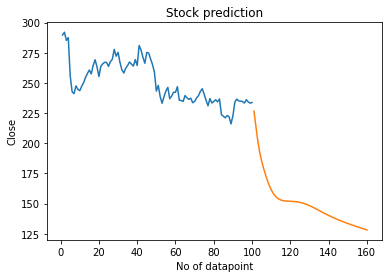

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.xlabel('No of datapoint')
plt.ylabel('Close')
plt.title('Stock prediction')